In [1]:
# IMPORTING THE REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### MAKING SOME FUNCTIONS THAT WE WILL REQUIRED LATER

In [2]:
# THIS WILL CHECK THE POSITION OF A TEAM IF THEY WON OR NOT AND THE RETURN VALUE WE WILL GET
# WE WILL USE IT TO SCATTER ON THE PLOT

def position(ratio,value):
    if value == '1st':
        return ratio
    else:
        return None

In [3]:
# THIS WILL CALCULATE THE WIN RATIO

def win_ratio(win,loss):
    w = int(win)
    l = int(loss)
    return w/l

In [4]:
# THIS WILL CALCULATE GOAL DIFFERENCE

def goal_difference(gf,ga):
    scored = int(gf)
    conceded = int(ga)
    return scored-conceded

In [5]:
# THIS WILL HELP TO CONVERT LARGE VALUES OF POUNDS IN HUMAN READABLE FORMAT
# EG:- 1000000 -> 1M

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

### FIRST WE WILL GET MANCHESTER CITY DATA FROM THE YEARS 2005-06 TO 2019-20 SEASONS AND CLEAN IT UNTIL WE GET ALL THE REQUIRED DATA

In [6]:
man_city_url = "https://en.wikipedia.org/wiki/List_of_Manchester_City_F.C._seasons"
man_city_table = pd.read_html(man_city_url)
mancity_df = man_city_table[0].tail(22)
mancity_df
# HERE IS THE DATA BEFORE CLEANING

Season          League                                          FA Cup  \
      Season Division (Tier)  Pld    W    D    L   GF   GA  Pts   Pos FA Cup   
126  2005–06        Prem (1)   38   13    4   21   43   48   43  15th     QF   
127  2006–07        Prem (1)   38   11    9   18   29   44   42  14th     QF   
128  2007–08        Prem (1)   38   15   10   13   45   53   55   9th     R4   
129  2008–09        Prem (1)   38   15    5   18   58   50   50  10th     R3   
130  2009–10        Prem (1)   38   18   13    7   73   45   67   5th     R5   
131  2010–11        Prem (1)   38   21    8    9   60   33   71   3rd      W   
132  2011–12        Prem (1)   38   28    5    5   93   29   89   1st     R3   
133  2011–12        Prem (1)   38   28    5    5   93   29   89   1st     R3   
134  2011–12        Prem (1)   38   28    5    5   93   29   89   1st     R3   
135  2012–13        Prem (1)   38   23    9    6   66   34   78   2nd     RU   
136  2012–13        Prem (1)   38   23    9    6   66   34   78   2nd     RU   
137  2013–14        Prem (1)   38   27    5    6  102   37   86   1st     QF   
138  2014–15        Prem (1)   38   24    7    7   83   38   79   2nd     R4   
139  2014–15        Prem (1)   38   24    7    7   83   38   79   2nd     R4   
140  2015–16        Prem (1)   38   19    9   10   71   41   66   4th     R5   
141  2016–17        Prem (1)   38   23    9    6   80   39   78   3rd     SF   
142  2017–18        Prem (1)   38   32    4    2  106   27  100   1st     R5   
143  2018–19        Prem (1)   38   32    2    4   95   23   98   1st      W   
144  2018–19        Prem (1)   38   32    2    4   95   23   98   1st      W   
145  2019–20        Prem (1)   38   26    3    9  102   35   81   2nd     SF   
146  2019–20        Prem (1)   38   26    3    9  102   35   81   2nd     SF   
147  2020–21        Prem (1)  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN   

    League Cup UEFA / FIFA / Other                        \
    League Cup UEFA / FIFA / Other UEFA / FIFA / Other.1   
126         R2                 NaN                   NaN   
127         R2                 NaN                   NaN   
128         QF                 NaN                   NaN   
129         R2            UEFA Cup                    QF   
130         SF                 NaN                   NaN   
131         R3       Europa League                   R16   
132         SF    Community Shield                    RU   
133         SF    Champions League                    GS   
134         SF       Europa League                   R16   
135         R3    Community Shield                     W   
136         R3    Champions League                    GS   
137          W    Champions League                   R16   
138         R3    Community Shield                    RU   
139         R3    Champions League                   R16   
140          W    Champions League                    SF   
141         R4    Champions League                   R16   
142          W    Champions League                    QF   
143          W    Community Shield                     W   
144          W    Champions League                    QF   
145          W    Community Shield                     W   
146          W    Champions League                    QF   
147        NaN    Champions League                   NaN   

               Top scorer(s)[a] Goals  
               Top scorer(s)[a] Goals  
126  Andrew Cole Darius Vassell    10  
127                 Joey Barton     7  
128                       Elano    10  
129                     Robinho    15  
130                Carlos Tevez    29  
131                Carlos Tevez    23  
132               Sergio Agüero    30  
133               Sergio Agüero    30  
134               Sergio Agüero    30  
135   Carlos TevezSergio Agüero    17  
136   Carlos TevezSergio Agüero    17  
137               Sergio Agüero    28  
138               Sergio Agüero    32  
139               Sergio Agüero    32  
140 

In [7]:
mancity_df.columns = mancity_df.columns.droplevel()
mancity_df = mancity_df.drop(['FA Cup','League Cup','UEFA / FIFA / Other','UEFA / FIFA / Other.1','Top scorer(s)[a]','Goals',
                             'Division (Tier)'],axis=1)

mancity_df = mancity_df.drop([132,133,135,138,143,145,147])
mancity_df = mancity_df.set_index('Season')

# USING THOSE FUNCTIONS THAT WE CREATED THROUGH np.vectorize
mancity_df['w/l ratio'] = np.vectorize(win_ratio)(mancity_df['W'],mancity_df['L'])
mancity_df['Pos'] = np.vectorize(position)(mancity_df['w/l ratio'],mancity_df['Pos'])
mancity_df['GD'] = np.vectorize(goal_difference)(mancity_df['GF'],mancity_df['GA'])

In [8]:
mancity_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,13,4,21,43,48,43,None,0.619048,-5
2006–07,38,11,9,18,29,44,42,None,0.611111,-15
2007–08,38,15,10,13,45,53,55,None,1.153846,-8
2008–09,38,15,5,18,58,50,50,None,0.833333,8
2009–10,38,18,13,7,73,45,67,None,2.571429,28
2010–11,38,21,8,9,60,33,71,None,2.333333,27
2011–12,38,28,5,5,93,29,89,5.6,5.600000,64
2012–13,38,23,9,6,66,34,78,None,3.833333,32
2013–14,38,27,5,6,102,37,86,4.5,4.500000,65


In [9]:
# THESE VALUES GOT FROM THIS WEBSITE https://www.transferleague.co.uk/ AND THEN IT IS COVERTED
# BY THE human_format function
mc_list = [9.75,2.40,45.82,127.70,125.00,154.75,76.00,54.00,103.20,87.50,152.10,
               168.85,272.20,69.75,155.55]
mancity_df.insert(10,'money spent (£ in millions)',mc_list)

In [10]:
# DATA AFTER CLEANING AND GETTING REQUIRED DATA

mancity_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,13,4,21,43,48,43,None,0.619048,-5,9.75
2006–07,38,11,9,18,29,44,42,None,0.611111,-15,2.40
2007–08,38,15,10,13,45,53,55,None,1.153846,-8,45.82
2008–09,38,15,5,18,58,50,50,None,0.833333,8,127.70
2009–10,38,18,13,7,73,45,67,None,2.571429,28,125.00
2010–11,38,21,8,9,60,33,71,None,2.333333,27,154.75
2011–12,38,28,5,5,93,29,89,5.6,5.600000,64,76.00
2012–13,38,23,9,6,66,34,78,None,3.833333,32,54.00
2013–14,38,27,5,6,102,37,86,4.5,4.500000,65,103.20


### NOW WE WILL GET MANCHESTER UNITED DATA FROM THE YEARS 2005-06 TO 2019-20 SEASONS AND CLEAN IT UNTIL WE GET ALL THE REQUIRED DATA

In [11]:
man_utd_url = "https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons"
man_utd_table = pd.read_html(man_utd_url)
manutd_df = man_utd_table[2].tail(15)
manutd_df

Season   League                                       FA Cup  EFL Cup  \
      Season Division Pld   W   D   L  GF  GA Pts  Pos      FA Cup  EFL Cup   
111  2005–06     Prem  38  25   8   5  72  34  83  2nd          R5  Winners   
112  2006–07     Prem  38  28   5   5  83  27  89  1st  Runners-up       R4   
113  2007–08     Prem  38  27   6   5  80  22  87  1st          R6       R3   
114  2008–09     Prem  38  28   6   4  68  24  90  1st          SF  Winners   
115  2009–10     Prem  38  27   4   7  86  28  85  2nd          R3  Winners   
116  2010–11     Prem  38  23  11   4  78  37  80  1st          SF       R5   
117  2011–12     Prem  38  28   5   5  89  33  89  2nd          R4       R5   
118  2012–13     Prem  38  28   5   5  86  43  89  1st          R6       R4   
119  2013–14     Prem  38  19   7  12  64  43  64  7th          R3       SF   
120  2014–15     Prem  38  20  10   8  62  37  70  4th          R6       R2   
121  2015–16     Prem  38  19   9  10  49  35  66  5th     Winners       R4   
122  2016–17     Prem  38  18  15   5  54  29  69  6th          R6  Winners   
123  2017–18     Prem  38  25   6   7  68  28  81  2nd  Runners-up       R5   
124  2018–19     Prem  38  19   9  10  65  54  66  6th          R6       R3   
125  2019–20     Prem  38  18  12   8  66  36  66  3rd          SF       SF   

    CommunityShield                                           UEFAFIFA  \
    CommunityShield                                           UEFAFIFA   
111             NaN                           Champions League – Group   
112             NaN                              Champions League – SF   
113         Winners                         Champions League – Winners   
114         Winners  Champions League – Runners-up Super Cup – Runn...   
115      Runners-up                              Champions League – QF   
116         Winners                      Champions League – Runners-up   
117         Winners  Champions League – Group Europa League – Round...   
118             NaN                     Champions League – Round of 16   
119         Winners                              Champions League – QF   
120             NaN                                                NaN   
121             NaN  Champions League – Group Europa League – Round...   
122         Winners                            Europa League – Winners   
123             NaN  Champions League – Round of 16 Super Cup – Run...   
124             NaN                              Champions League – QF   
125             NaN                                 Europa League – SF   

              Top goalscorer(s)[a]          
                           Name(s)   Goals  
111            Ruud van Nistelrooy      24  
112  Wayne RooneyCristiano Ronaldo      23  
113              Cristiano Ronaldo   42[y]  
114              Cristiano Ronaldo      26  
115                   Wayne Rooney      34  
116            Dimitar Berbatov[z]  21[aa]  
117                   Wayne Rooney      34  
118               Robin van Persie  30[ab]  
119                   Wayne Rooney      19  
120                   Wayne Rooney      14  
121                Anthony Martial      17  
122             Zlatan Ibrahimović      28  
123                  Romelu Lukaku      27  
124                     Paul Pogba      16  
125                Anthony Martial      23

In [12]:
manutd_df.columns = manutd_df.columns.droplevel()
manutd_df = manutd_df.drop(['Division','FA Cup','EFL Cup','CommunityShield','UEFAFIFA','Name(s)','Goals'],axis=1)
manutd_df = manutd_df.set_index('Season')

manutd_df['w/l ratio'] = np.vectorize(win_ratio)(manutd_df['W'],manutd_df['L'])
manutd_df['Pos'] = np.vectorize(position)(manutd_df['w/l ratio'],manutd_df['Pos'])
manutd_df['GD'] = np.vectorize(goal_difference)(manutd_df['GF'],manutd_df['GA'])
manutd_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,25,8,5,72,34,83,None,5.000000,38
2006–07,38,28,5,5,83,27,89,5.6,5.600000,56
2007–08,38,27,6,5,80,22,87,5.4,5.400000,58
2008–09,38,28,6,4,68,24,90,7,7.000000,44
2009–10,38,27,4,7,86,28,85,None,3.857143,58
2010–11,38,23,11,4,78,37,80,5.75,5.750000,41
2011–12,38,28,5,5,89,33,89,None,5.600000,56
2012–13,38,28,5,5,86,43,89,5.6,5.600000,43
2013–14,38,19,7,12,64,43,64,None,1.583333,21


In [13]:
mu_list = [19.50,18.60,61.75,35.75,21.00,27.20,52.90,63.00,67.70,145.50,103.60,
          149.00,146.00,67.53,145.00]
manutd_df.insert(10,'money spent (£ in millions)',mu_list)
manutd_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,25,8,5,72,34,83,None,5.000000,38,19.50
2006–07,38,28,5,5,83,27,89,5.6,5.600000,56,18.60
2007–08,38,27,6,5,80,22,87,5.4,5.400000,58,61.75
2008–09,38,28,6,4,68,24,90,7,7.000000,44,35.75
2009–10,38,27,4,7,86,28,85,None,3.857143,58,21.00
2010–11,38,23,11,4,78,37,80,5.75,5.750000,41,27.20
2011–12,38,28,5,5,89,33,89,None,5.600000,56,52.90
2012–13,38,28,5,5,86,43,89,5.6,5.600000,43,63.00
2013–14,38,19,7,12,64,43,64,None,1.583333,21,67.70


### ARSENAL DATA

In [14]:
arsenal_url = "https://en.wikipedia.org/wiki/List_of_Arsenal_F.C._seasons"
arsenal_table = pd.read_html(arsenal_url)
arsenal_df = arsenal_table[3].tail(15)
arsenal_df

,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup[56][d],LeagueCup[57],CommunityShield[57],Competition,Result,Name(s),Goals
,Season,League[58],League[58],League[58],League[58],League[58],League[58],League[58],League[58],League[58],FA Cup[56][d],LeagueCup[57],CommunityShield[57],Other / Europe[59][e],Other / Europe[59][e],Top goalscorer(s)[f],Top goalscorer(s)[f]
112,2005–06,Prem,38,20,7,11,68,31,67,4th,R4,SF,RU,Champions League,RU,Thierry Henry,33 ♦
113,2006–07,Prem,38,19,11,8,63,35,68,4th,R5,RU,—,Champions League,R16,Robin van Persie,13
114,2007–08,Prem,38,24,11,3,74,31,83,3rd,R5,SF,—,Champions League,QF,Emmanuel Adebayor,30
115,2008–09,Prem,38,20,12,6,68,37,72,4th,SF,QF,—,Champions League,SF,Robin van Persie,20
116,2009–10,Prem,38,23,6,9,83,41,75,3rd,R4,QF,—,Champions League,QF,Cesc Fàbregas,19
117,2010–11,Prem,38,19,11,8,72,43,68,4th,QF,RU,—,Champions League,R16,Robin van Persie,22
118,2011–12,Prem,38,21,7,10,74,49,70,3rd,R5,QF,—,Champions League,R16,Robin van Persie,37 ♦
119,2012–13,Prem,38,21,10,7,72,37,73,4th,R5,QF,—,Champions League,R16,Theo Walcott,21
120,2013–14,Prem,38,24,7,7,68,41,79,4th,W,R4,—,Champions League,R16,Olivier Giroud,22


In [15]:
arsenal_column_name_list = ['Season','Division','Pld','W','D','L','GF','GA','Pts','Pos','FA Cup[56][d]','LeagueCup[57]',
                           'CommunityShield[57]','Competition','Result','Name(s)','Goals']
arsenal_df.columns = arsenal_column_name_list
arsenal_df = arsenal_df.drop(['Division','FA Cup[56][d]','LeagueCup[57]','CommunityShield[57]','Competition','Result',
                              'Name(s)','Goals'],axis=1)
arsenal_df = arsenal_df.set_index('Season')

arsenal_df['w/l ratio'] = np.vectorize(win_ratio)(arsenal_df['W'],arsenal_df['L'])
arsenal_df['Pos'] = np.vectorize(position)(arsenal_df['w/l ratio'],arsenal_df['Pos'])
arsenal_df['GD'] = np.vectorize(goal_difference)(arsenal_df['GF'],arsenal_df['GA'])
arsenal_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,20,7,11,68,31,67,None,1.818182,37
2006–07,38,19,11,8,63,35,68,None,2.375000,28
2007–08,38,24,11,3,74,31,83,None,8.000000,43
2008–09,38,20,12,6,68,37,72,None,3.333333,31
2009–10,38,23,6,9,83,41,75,None,2.555556,42
2010–11,38,19,11,8,72,43,68,None,2.375000,29
2011–12,38,21,7,10,74,49,70,None,2.100000,25
2012–13,38,21,10,7,72,37,73,None,3.000000,35
2013–14,38,24,7,7,68,41,79,None,3.428571,27


In [16]:
arsenal_list = [36.90,13.90,31.00,15.75,10.00,14.50,53.23,52.30,42.50,95.60,15.00,
               92.94,110.90,71.30,153.00]
arsenal_df.insert(10,'money spent (£ in millions)',arsenal_list)
arsenal_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,20,7,11,68,31,67,None,1.818182,37,36.90
2006–07,38,19,11,8,63,35,68,None,2.375000,28,13.90
2007–08,38,24,11,3,74,31,83,None,8.000000,43,31.00
2008–09,38,20,12,6,68,37,72,None,3.333333,31,15.75
2009–10,38,23,6,9,83,41,75,None,2.555556,42,10.00
2010–11,38,19,11,8,72,43,68,None,2.375000,29,14.50
2011–12,38,21,7,10,74,49,70,None,2.100000,25,53.23
2012–13,38,21,10,7,72,37,73,None,3.000000,35,52.30
2013–14,38,24,7,7,68,41,79,None,3.428571,27,42.50


### LIVERPOOL DATA

In [17]:
liverpool_url = "https://en.wikipedia.org/wiki/List_of_Liverpool_F.C._seasons"
liverpool_table = pd.read_html(liverpool_url)
liverpool_df = liverpool_table[2].tail(16)
liverpool_df

Season    League                                     FA Cup League Cup  \
      Season  Division   P   W   D   L    F   A  Pts  Pos  FA Cup League Cup   
105  2005–06        PL  38  25   7   6   57  25   82  3rd       W         R3   
106  2006–07        PL  38  20   8  10   57  27   68  3rd      R3         R5   
107  2007–08        PL  38  21  13   4   67  28   76  4th      R5         R5   
108  2008–09        PL  38  25  11   2   77  27   86  2nd      R4         R4   
109  2009–10        PL  38  18   9  11   61  35   63  7th      R3         R4   
110  2010–11        PL  38  17   7  14   59  44   58  6th      R3         R3   
111  2011–12        PL  38  14  10  14   47  40   52  8th      RU          W   
112  2012–13        PL  38  16  13   9   71  43   61  7th      R4         R4   
113  2013–14        PL  38  26   6   6  101  50   84  2nd      R5         R3   
114  2014–15        PL  38  18   8  12   52  48   62  6th      SF         SF   
115  2015–16        PL  38  16  12  10   63  50   60  8th      R4         RU   
116  2016–17        PL  38  22  10   6   78  42   76  4th      R4         SF   
117  2017–18        PL  38  21  12   5   84  38   75  4th      R4         R3   
118  2018–19        PL  38  30   7   1   89  22   97  2nd      R3         R3   
119  2019–20        PL  38  32   3   3   85  33   99  1st      R5         QF   
120   Season  Division   P   W   D   L    F   A  Pts  Pos  FA Cup    EFL Cup   

     Comm. Shield     UCL  UEL  CWC  Super Cup  Club World Cup  \
     Comm. Shield     UCL  UEL  CWC  Super Cup  Club World Cup   
105             —     R16    —    —          W              RU   
106             W      RU    —    —          —               —   
107             —      SF    —    —          —               —   
108             —      QF    —    —          —               —   
109             —  Grp[m]   SF    —          —               —   
110             —       —  R16    —          —               —   
111             —       —    —    —          —               —   
112             —       —  R32    —          —               —   
113             —       —    —    —          —               —   
114             —  Grp[m]  R32    —          —               —   
115             —       —   RU    —          —               —   
116             —       —    —    —          —               —   
117             —      RU    —    —          —               —   
118             —       W    —    —          —               —   
119            RU     R16    —    —          W               W   
120  Comm. Shield      CL   EL  CWC  Super Cup  Club World Cup   

         Top scorer(s)         
                  Name  Goals  
105     Steven Gerrard     23  
106       Peter Crouch     18  
107    Fernando Torres     33  
108     Steven Gerrard     24  
109    Fernando Torres     22  
110          Dirk Kuyt     15  
111        Luis Suárez     17  
112        Luis Suárez     30  
113     Luis Suárez[n]   31 ♦  
114     Steven Gerrard     13  
115   Daniel Sturridge     13  
116  Philippe Coutinho     14  
117   Mohamed Salah[o]   44 ♦  
118   Mohamed Salah[p]   27 ♦  
119      Mohamed Salah     23  
120               Name  Goals

In [18]:
liverpool_df.columns = liverpool_df.columns.droplevel()
liverpool_df = liverpool_df.drop(['Division','FA Cup','League Cup','Comm. Shield','UCL','UEL','CWC','Super Cup','Club World Cup',
                  'Name','Goals'],axis=1)
liverpool_df = liverpool_df.drop(120)
liverpool_df = liverpool_df.set_index('Season')

liverpool_df['w/l ratio'] = np.vectorize(win_ratio)(liverpool_df['W'],liverpool_df['L'])
liverpool_df['Pos'] = np.vectorize(position)(liverpool_df['w/l ratio'],liverpool_df['Pos'])
liverpool_df['GD'] = np.vectorize(goal_difference)(liverpool_df['F'],liverpool_df['A'])
liverpool_df

,P,W,D,L,F,A,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,25,7,6,57,25,82,None,4.166667,32
2006–07,38,20,8,10,57,27,68,None,2.000000,30
2007–08,38,21,13,4,67,28,76,None,5.250000,39
2008–09,38,25,11,2,77,27,86,None,12.500000,50
2009–10,38,18,9,11,61,35,63,None,1.636364,26
2010–11,38,17,7,14,59,44,58,None,1.214286,15
2011–12,38,14,10,14,47,40,52,None,1.000000,7
2012–13,38,16,13,9,71,43,61,None,1.777778,28
2013–14,38,26,6,6,101,50,84,None,4.333333,51


In [19]:
liverpool_list = [35.14,28.04,69.75,39.00,36.00,80.45,56.40,49.30,48.80,117.00,
                 82.60,67.90,155.00,161.00,4.40]
liverpool_df.insert(10,'money spent (£ in millions)',liverpool_list)
liverpool_df

,P,W,D,L,F,A,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,25,7,6,57,25,82,None,4.166667,32,35.14
2006–07,38,20,8,10,57,27,68,None,2.000000,30,28.04
2007–08,38,21,13,4,67,28,76,None,5.250000,39,69.75
2008–09,38,25,11,2,77,27,86,None,12.500000,50,39.00
2009–10,38,18,9,11,61,35,63,None,1.636364,26,36.00
2010–11,38,17,7,14,59,44,58,None,1.214286,15,80.45
2011–12,38,14,10,14,47,40,52,None,1.000000,7,56.40
2012–13,38,16,13,9,71,43,61,None,1.777778,28,49.30
2013–14,38,26,6,6,101,50,84,None,4.333333,51,48.80


### CHELSEA DATA

In [20]:
chelsea_url = "https://en.wikipedia.org/wiki/List_of_Chelsea_F.C._seasons"
chelsea_table = pd.read_html(chelsea_url)
chelsea_df = chelsea_table[2].tail(17)
chelsea_df

Season    League                                                  \
      Season  Division     Pld       W       D       L      GF      GA   
92   2005–06      Prem      38      29       4       5      72      22   
93   2006–07      Prem      38      24      11       3      64      24   
94   2007–08      Prem      38      25      10       3      65      26   
95   2008–09      Prem      38      25       8       5      68      24   
96   2009–10      Prem      38      27       5       6     103      32   
97   2010–11      Prem      38      21       8       9      69      33   
98   2011–12      Prem      38      18      10      10      65      46   
99   2012–13      Prem      38      22       9       7      75      39   
100  2013–14      Prem      38      25       7       6      71      27   
101  2014–15      Prem      38      26       9       3      73      32   
102  2015–16      Prem      38      12      14      12      59      53   
103  2016–17      Prem      38      30       3       5      85      33   
104  2017–18      Prem      38      21       7      10      62      38   
105  2018–19      Prem      38      21       9       8      63      39   
106  2019–20      Prem      38      20       6      12      69      54   
107   Season    League  League  League  League  League  League  League   
108   Season  Division     Pld       W       D       L      GF      GA   

                     ...  EFLCup  Other competitions                      \
        Pts     Pos  ...  EFLCup                  CS                  CL   
92       91     1st  ...      R3                   W                 R16   
93       83     2nd  ...       W                  RU                  SF   
94       85     2nd  ...      RU                  RU                  RU   
95       83     3rd  ...      R4                 NaN                  SF   
96       86     1st  ...      R5                   W                 R16   
97       71     2nd  ...      R3                  RU                  QF   
98       64     6th  ...      R5                 NaN                   W   
99       75     3rd  ...      SF                  RU                  GS   
100      82     3rd  ...      R5                 NaN                  SF   
101      87     1st  ...       W                 NaN                 R16   
102      50    10th  ...      R4                  RU                 R16   
103      93     1st  ...      R4                 NaN                 NaN   
104      70     5th  ...      SF                  RU                 R16   
105      72     3rd  ...      RU                  RU                 NaN   
106      66     4th  ...      R4                 NaN                 R16   
107  League  League  ...  EFLCup  Other competitions  Other competitions   
108     Pts     Pos  ...  EFLCup                  CS                  CL   

                                                                 \
                     EL                  CW                  SC   
92                  NaN                 NaN                 NaN   
93                  NaN                 NaN                 NaN   
94                  NaN                 NaN                 NaN   
95                  NaN                 NaN                 NaN   
96                  NaN                 NaN                 NaN   
97                  NaN                 NaN                 NaN   
98                  NaN                 NaN                 NaN   
99                    W                 NaN                  RU   
100                 NaN                 NaN                  RU   
101                 NaN                 NaN                 NaN   
102                 NaN                 NaN                 NaN   
103                 NaN                 NaN                 NaN   
104                 NaN                 NaN                 NaN   
105                   W                 NaN                 NaN   
106                 NaN                 NaN                  RU   
107  Other comp

In [21]:
chelsea_df.columns = chelsea_df.columns.droplevel()
chelsea_df = chelsea_df.drop(['Division','FACup','EFLCup','CS','CL','EL','CW','SC','CWC','FM','Name(s)','Goals'],axis=1)
chelsea_df = chelsea_df.drop([107,108]).set_index('Season')

chelsea_df['w/l ratio'] = np.vectorize(win_ratio)(chelsea_df['W'],chelsea_df['L'])
chelsea_df['Pos'] = np.vectorize(position)(chelsea_df['w/l ratio'],chelsea_df['Pos'])
chelsea_df['GD'] = np.vectorize(goal_difference)(chelsea_df['GF'],chelsea_df['GA'])
chelsea_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,29,4,5,72,22,91,5.800000,5.800000,50
2006–07,38,24,11,3,64,24,83,NaN,8.000000,40
2007–08,38,25,10,3,65,26,85,NaN,8.333333,39
2008–09,38,25,8,5,68,24,83,NaN,5.000000,44
2009–10,38,27,5,6,103,32,86,4.500000,4.500000,71
2010–11,38,21,8,9,69,33,71,NaN,2.333333,36
2011–12,38,18,10,10,65,46,64,NaN,1.800000,19
2012–13,38,22,9,7,75,39,75,NaN,3.142857,36
2013–14,38,25,7,6,71,27,82,NaN,4.166667,44


In [22]:
chelsea_list = [111.90,12.00,40.50,24.20,23.50,94.60,87.80,92.00,105.91,118.30,
               71.95,119.30,240.00,185.60,40.00]
chelsea_df.insert(10,'money spent (£ in millions)',chelsea_list)
chelsea_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,29,4,5,72,22,91,5.800000,5.800000,50,111.90
2006–07,38,24,11,3,64,24,83,NaN,8.000000,40,12.00
2007–08,38,25,10,3,65,26,85,NaN,8.333333,39,40.50
2008–09,38,25,8,5,68,24,83,NaN,5.000000,44,24.20
2009–10,38,27,5,6,103,32,86,4.500000,4.500000,71,23.50
2010–11,38,21,8,9,69,33,71,NaN,2.333333,36,94.60
2011–12,38,18,10,10,65,46,64,NaN,1.800000,19,87.80
2012–13,38,22,9,7,75,39,75,NaN,3.142857,36,92.00
2013–14,38,25,7,6,71,27,82,NaN,4.166667,44,105.91


### TOTTENHAM DATA

In [23]:
tottenham_url = "https://en.wikipedia.org/wiki/List_of_Tottenham_Hotspur_F.C._seasons"
tottenham_table = pd.read_html(tottenham_url)
tottenham_df = tottenham_table[0].tail(16)
tottenham_df

Season   League                                   FA Cup EFL Cup  \
      Season Division Pld   W   D   L  GF  GA Pts   Pos FA Cup EFL Cup   
142  2005–06     Prem  38  18  11   9  53  38  65   5th     R3      R2   
143  2006–07     Prem  38  17   9  12  57  54  60   5th     QF      SF   
144  2007–08     Prem  38  11  13  14  66  61  46  11th     R4       W   
145  2008–09     Prem  38  14   9  15  45  45  51   8th     R4     R/U   
146  2009–10     Prem  38  21   7  10  67  41  70   4th     SF      QF   
147  2010–11     Prem  38  16  14   8  55  46  62   5th     R4      R3   
148  2011–12     Prem  38  20   9   9  66  41  69   4th     SF      R3   
149  2012–13     Prem  38  21   9   8  66  46  72   5th     R4      R4   
150  2013–14     Prem  38  21   6  11  55  51  69   6th     R3      QF   
151  2014–15     Prem  38  19   7  12  58  53  64   5th     R4     R/U   
152  2015–16     Prem  38  19  13   6  69  35  70   3rd     R5      R3   
153  2016–17     Prem  38  26   8   4  86  26  86   2nd     SF      R4   
154  2016–17     Prem  38  26   8   4  86  26  86   2nd     SF      R4   
155  2017–18     Prem  38  23   8   7  74  36  77   3rd     SF      R4   
156  2018–19     Prem  38  23   2  13  67  39  71   4th     R4      SF   
157  2019–20     Prem  38  16  11  11  61  47  59   6th     R5      R3   

       Europe / Other                        Top goalscorer(s)[a][1]        
       Europe / Other Europe / Other.1                       Name(s) Goals  
142               NaN              NaN                  Robbie Keane    16  
143          UEFA Cup               QF              Dimitar Berbatov    23  
144          UEFA Cup              R16  Dimitar BerbatovRobbie Keane    23  
145          UEFA Cup              R32                   Darren Bent    17  
146               NaN              NaN                 Jermain Defoe    24  
147  Champions League               QF          Rafael van der Vaart    15  
148     Europa League               GS             Emmanuel Adebayor    18  
149     Europa League               QF                   Gareth Bale    26  
150     Europa League              R16             Emmanuel Adebayor    14  
151     Europa League              R32                    Harry Kane    31  
152     Europa League              R16                    Harry Kane    28  
153  Champions League               GS                    Harry Kane    35  
154     Europa League              R32                    Harry Kane    35  
155  Champions League              R16                    Harry Kane    41  
156  Champions League              R/U                    Harry Kane    24  
157  Champions League              R16                    Harry Kane    24

In [24]:
tottenham_df.columns = tottenham_df.columns.droplevel()
tottenham_df = tottenham_df.drop(['Division','FA Cup', 'EFL Cup', 'Europe / Other', 'Europe / Other.1', 'Name(s)','Goals']
                                 ,axis=1)
tottenham_df = tottenham_df.drop(153)
tottenham_df = tottenham_df.set_index('Season')

tottenham_df['w/l ratio'] = np.vectorize(win_ratio)(chelsea_df['W'],tottenham_df['L'])
tottenham_df['Pos'] = np.vectorize(position)(chelsea_df['w/l ratio'],tottenham_df['Pos'])
tottenham_df['GD'] = np.vectorize(goal_difference)(chelsea_df['GF'],tottenham_df['GA'])
tottenham_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD
Season,,,,,,,,,,
2005–06,38,18,11,9,53,38,65,None,3.222222,34
2006–07,38,17,9,12,57,54,60,None,2.000000,10
2007–08,38,11,13,14,66,61,46,None,1.785714,4
2008–09,38,14,9,15,45,45,51,None,1.666667,23
2009–10,38,21,7,10,67,41,70,None,2.700000,62
2010–11,38,16,14,8,55,46,62,None,2.625000,23
2011–12,38,20,9,9,66,41,69,None,2.000000,24
2012–13,38,21,9,8,66,46,72,None,2.750000,29
2013–14,38,21,6,11,55,51,69,None,2.272727,20


In [25]:
tottenham_list = [34.40,48.90,48.70,87.20,32.00,18.50,8.00,61.50,103.70,27.95,
                 53.50,68.80,112.50,0.00,87.50]
tottenham_df.insert(10,'money spent (£ in millions)',tottenham_list)
tottenham_df

,Pld,W,D,L,GF,GA,Pts,Pos,w/l ratio,GD,money spent (£ in millions)
Season,,,,,,,,,,,
2005–06,38,18,11,9,53,38,65,None,3.222222,34,34.40
2006–07,38,17,9,12,57,54,60,None,2.000000,10,48.90
2007–08,38,11,13,14,66,61,46,None,1.785714,4,48.70
2008–09,38,14,9,15,45,45,51,None,1.666667,23,87.20
2009–10,38,21,7,10,67,41,70,None,2.700000,62,32.00
2010–11,38,16,14,8,55,46,62,None,2.625000,23,18.50
2011–12,38,20,9,9,66,41,69,None,2.000000,24,8.00
2012–13,38,21,9,8,66,46,72,None,2.750000,29,61.50
2013–14,38,21,6,11,55,51,69,None,2.272727,20,103.70


### NOW PLOTTING THE DATA

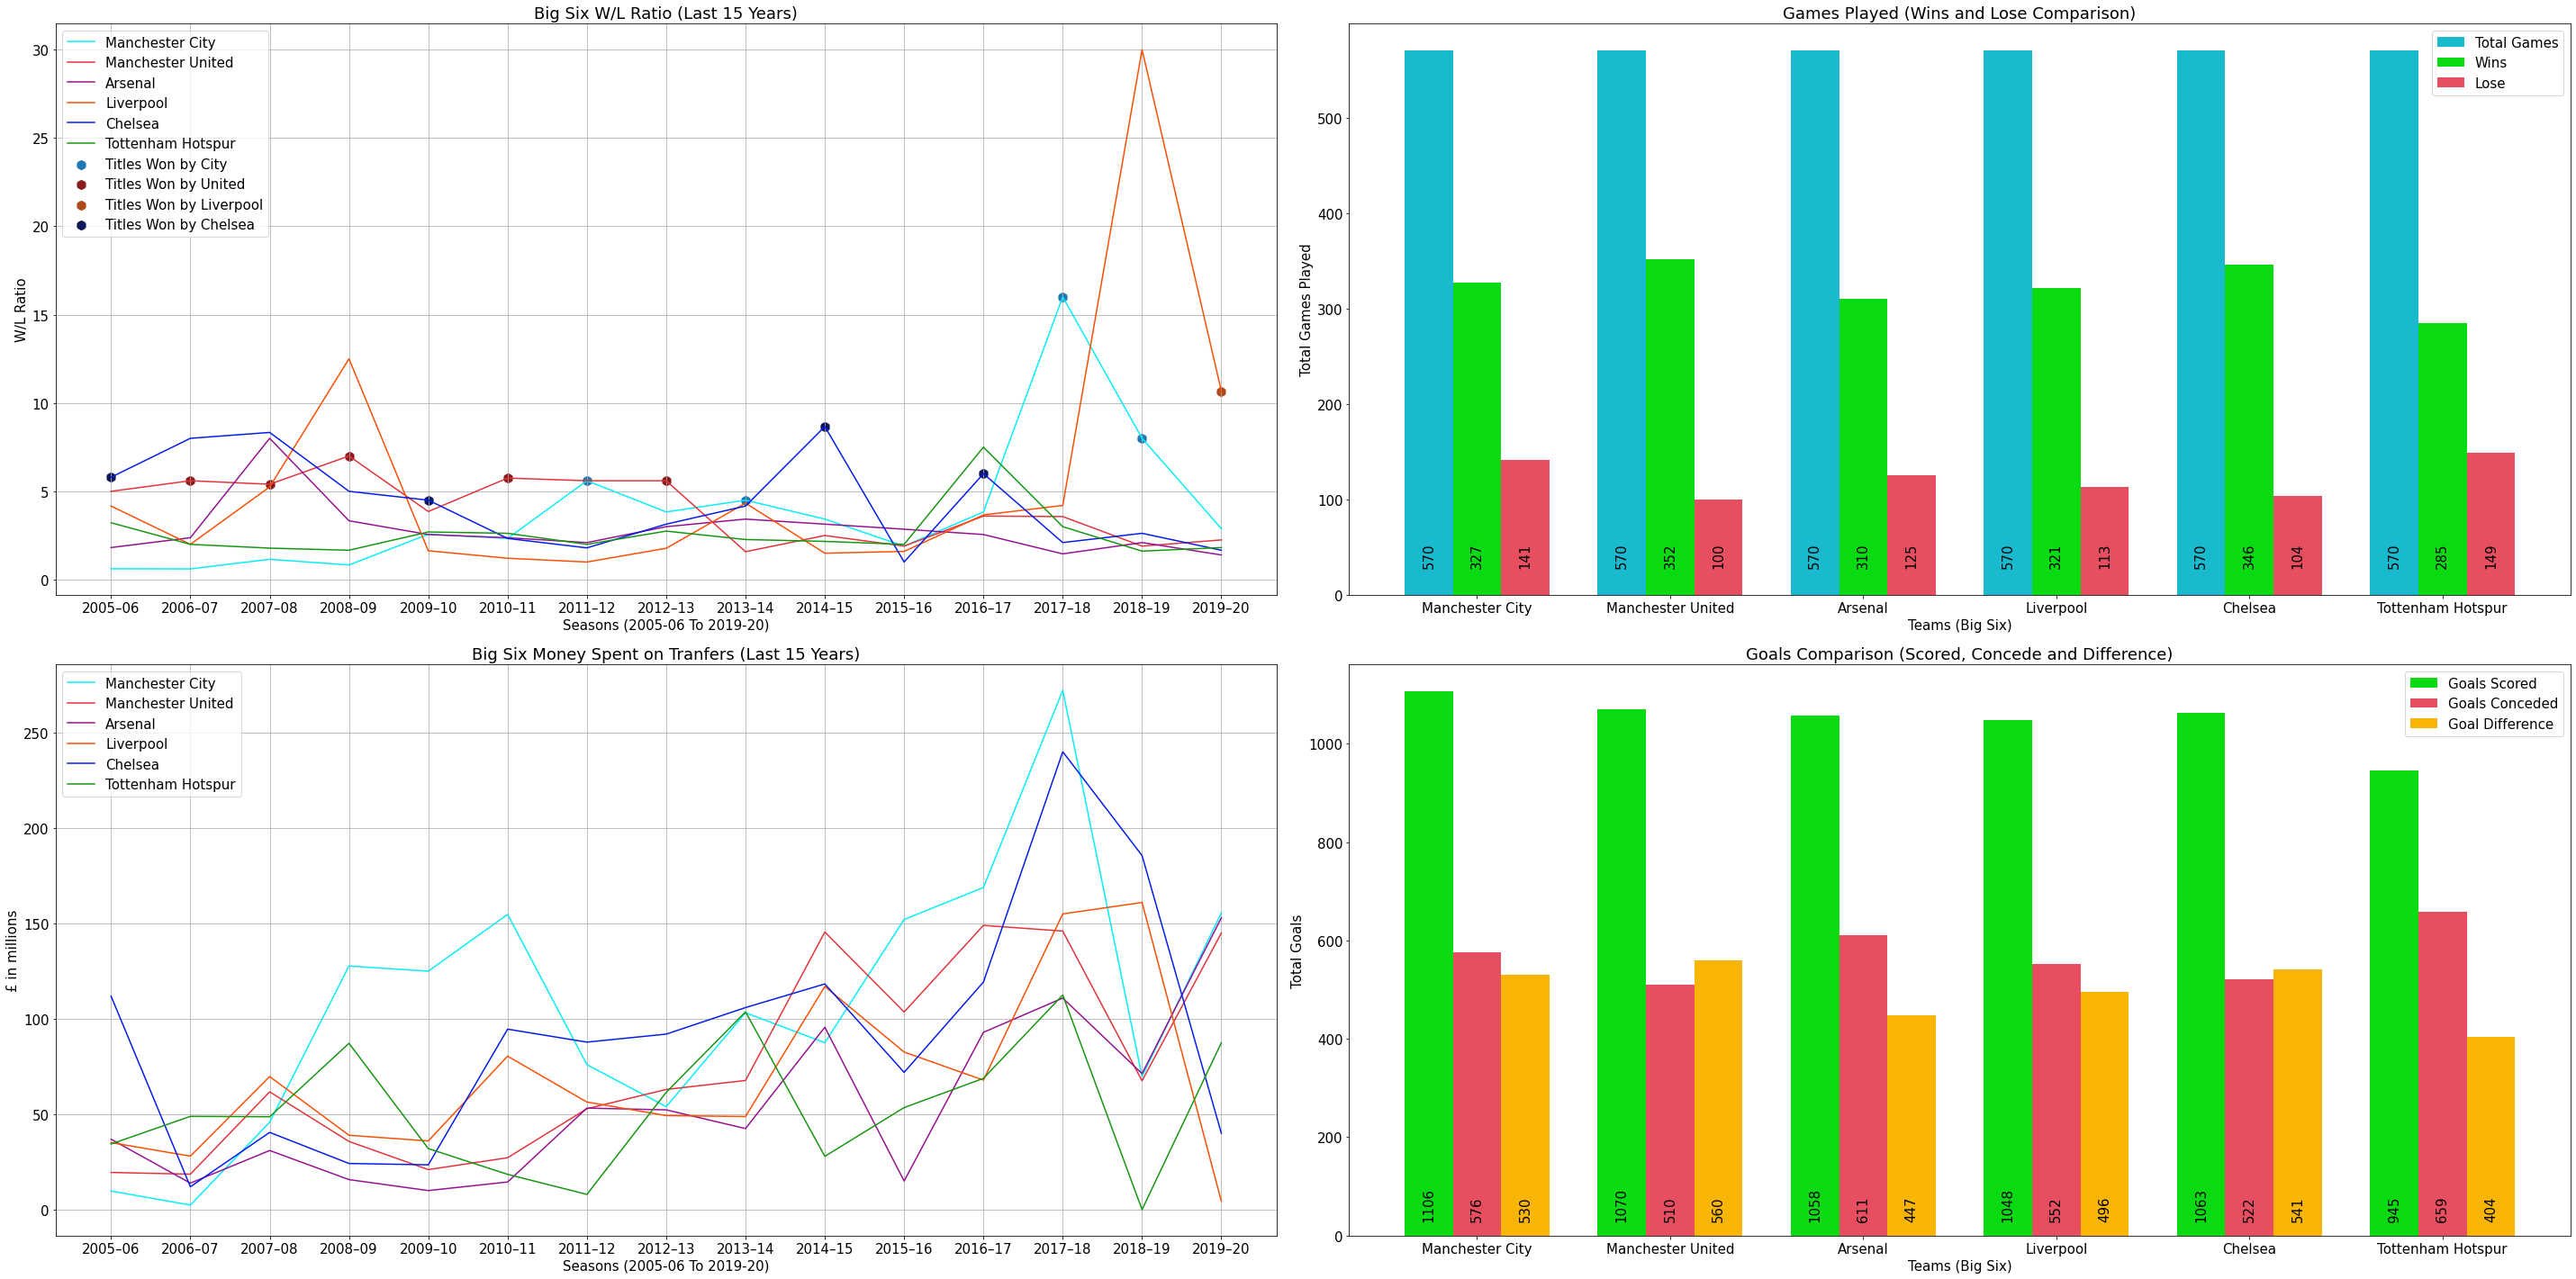

In [26]:
# THIS WILL SET ITS SIZE
plt.figure(figsize=(40,20))

# PLOT 1 WIN/LOSS RATIO PLOT

# THIS WILL SET FONT SIZE OF ENTIRE GRAPH
plt.rc('font', size=15)

win_ratio_plot = plt.subplot(2,2,1)

# SETTING UP LINE AND SCATTER GRAPH
win_ratio_plot.plot(mancity_df.index,mancity_df['w/l ratio'],color='#06EEF9',label='Manchester City')
win_ratio_plot.scatter(mancity_df.index,mancity_df['Pos'],linewidths=5,marker='h',label='Titles Won by City')

win_ratio_plot.plot(manutd_df.index,manutd_df['w/l ratio'],color='#E1333B',label='Manchester United')
win_ratio_plot.scatter(manutd_df.index,manutd_df['Pos'],color='#891D1D',linewidths=5,marker='h',label='Titles Won by United')

win_ratio_plot.plot(arsenal_df.index,arsenal_df['w/l ratio'],color='#95118F',label='Arsenal')

win_ratio_plot.plot(liverpool_df.index,liverpool_df['w/l ratio'],color='#FA4F04',label='Liverpool')
win_ratio_plot.scatter(liverpool_df.index,liverpool_df['Pos'],color='#B04A1D',linewidths=5,marker='h',label='Titles Won by Liverpool')

win_ratio_plot.plot(chelsea_df.index,chelsea_df['w/l ratio'],color='#041CE9',label='Chelsea')
win_ratio_plot.scatter(chelsea_df.index,chelsea_df['Pos'],color='#101756',linewidths=5,marker='h',label='Titles Won by Chelsea')

win_ratio_plot.plot(tottenham_df.index,tottenham_df['w/l ratio'],color='#169511',label='Tottenham Hotspur')

win_ratio_plot.grid()
win_ratio_plot.set_title("Big Six W/L Ratio (Last 15 Years)")
win_ratio_plot.set_xlabel("Seasons (2005-06 To 2019-20)")
win_ratio_plot.set_ylabel('W/L Ratio')
win_ratio_plot.legend()

# PLOT 2 MONEY SPENT ON TRANSFERS BY EACH TEAM BY SEASONS PLOT

# SETTING UP LINE GRAPH
money_spent = plt.subplot(2,2,3)
money_spent.plot(mancity_df.index,mancity_df['money spent (£ in millions)'],color='#06EEF9',label='Manchester City')
money_spent.plot(manutd_df.index,manutd_df['money spent (£ in millions)'],color='#E1333B',label='Manchester United')
money_spent.plot(arsenal_df.index,arsenal_df['money spent (£ in millions)'],color='#95118F',label='Arsenal')
money_spent.plot(liverpool_df.index,liverpool_df['money spent (£ in millions)'],color='#FA4F04',label='Liverpool')
money_spent.plot(chelsea_df.index,chelsea_df['money spent (£ in millions)'],color='#041CE9',label='Chelsea')
money_spent.plot(tottenham_df.index,tottenham_df['money spent (£ in millions)'],color='#169511',label='Tottenham Hotspur')

money_spent.grid()
money_spent.set_title("Big Six Money Spent on Tranfers (Last 15 Years)")
money_spent.set_xlabel("Seasons (2005-06 To 2019-20)")
money_spent.set_ylabel("£ in millions")
money_spent.legend()

# PLOT 3 WINS AND LOSE COMPARISON OF EACH TEAM 

# SETTING UP BAR GRAPH
wins_and_lose = plt.subplot(2,2,2)
teams = ['Manchester City','Manchester United','Arsenal','Liverpool','Chelsea','Tottenham Hotspur']
teams_position = np.arange(len(teams))

games_win_loss_data = [[pd.to_numeric(mancity_df['Pld']).sum()],
                       
        [pd.to_numeric(mancity_df['W']).sum(),pd.to_numeric(manutd_df['W']).sum(),pd.to_numeric(arsenal_df['W']).sum(),
        pd.to_numeric(liverpool_df['W']).sum(),pd.to_numeric(chelsea_df['W']).sum(),pd.to_numeric(tottenham_df['W']).sum()],
                       
        [pd.to_numeric(mancity_df['L']).sum(),pd.to_numeric(manutd_df['L']).sum(),pd.to_numeric(arsenal_df['L']).sum(),
        pd.to_numeric(liverpool_df['L']).sum(),pd.to_numeric(chelsea_df['L']).sum(),pd.to_numeric(tottenham_df['L']).sum()]]

bar_plot_1 = wins_and_lose.bar(teams_position - 0.25, games_win_loss_data[0], color = '#19BACE', width = 0.25, label='Total Games')
bar_plot_2 = wins_and_lose.bar(teams_position , games_win_loss_data[1], color = '#09DA12', width = 0.25,tick_label=teams, label='Wins')
bar_plot_3 = wins_and_lose.bar(teams_position + 0.25, games_win_loss_data[2], color = '#E74F61', width = 0.25, label='Lose')

bar_label_1 = [570,570,570,570,570,570]
bar_label_2 = games_win_loss_data[1]
bar_label_3 = games_win_loss_data[2]

# THIS FUNCTION WILL SET NUMBERS INSIDE THE BAR
def autolabel(rects,bar_label,wid,hei):
    for idx,rect in enumerate(bar_plot_1):
        height = rect.get_height()
        wins_and_lose.text(rect.get_x() + wid/2., hei*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)
        
autolabel(bar_plot_1,bar_label_1,0.25,0.05) 
autolabel(bar_plot_2,bar_label_2,0.75,0.05)
autolabel(bar_plot_3,bar_label_3,1.25,0.05)

wins_and_lose.set_title("Games Played (Wins and Lose Comparison)")
wins_and_lose.set_xlabel("Teams (Big Six)")
wins_and_lose.set_ylabel("Total Games Played")
wins_and_lose.legend()

# PLOT 4 GOALS COMPARISON

# SETTING UP BAR GRAPH
goals_comparison = plt.subplot(2,2,4)

goals_scored_data = [[pd.to_numeric(mancity_df['GF']).sum(),pd.to_numeric(manutd_df['GF']).sum(),pd.to_numeric(arsenal_df['GF']).sum(),
        pd.to_numeric(liverpool_df['F']).sum(),pd.to_numeric(chelsea_df['GF']).sum(),pd.to_numeric(tottenham_df['GF']).sum()],
             
             [pd.to_numeric(mancity_df['GA']).sum(),pd.to_numeric(manutd_df['GA']).sum(),pd.to_numeric(arsenal_df['GA']).sum(),
        pd.to_numeric(liverpool_df['A']).sum(),pd.to_numeric(chelsea_df['GA']).sum(),pd.to_numeric(tottenham_df['GA']).sum()],
              
             [mancity_df['GD'].sum(),manutd_df['GD'].sum(),arsenal_df['GD'].sum(),liverpool_df['GD'].sum(),
             chelsea_df['GD'].sum(),tottenham_df['GD'].sum()]]

bar_plot_4 = goals_comparison.bar(teams_position - 0.25, goals_scored_data[0], color = '#09DA12', width = 0.25, label='Goals Scored')
bar_plot_5 = goals_comparison.bar(teams_position , goals_scored_data[1], color = '#E74F61', width = 0.25,tick_label=teams, label='Goals Conceded')
bar_plot_6 = goals_comparison.bar(teams_position + 0.25, goals_scored_data[2], color = '#F9B505', width = 0.25, label='Goal Difference')

bar_label_4 = goals_scored_data[0]
bar_label_5 = goals_scored_data[1]
bar_label_6 = goals_scored_data[2]

def autolabel_2(rects,bar_label,wid,hei):
    for idx,rect in enumerate(bar_plot_1):
        height = rect.get_height()
        goals_comparison.text(rect.get_x() + wid/2., hei*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)

autolabel_2(bar_plot_4,bar_label_4,0.25,0.05) 
autolabel_2(bar_plot_5,bar_label_5,0.75,0.05)
autolabel_2(bar_plot_6,bar_label_6,1.25,0.05)

goals_comparison.set_title("Goals Comparison (Scored, Concede and Difference)")
goals_comparison.set_xlabel("Teams (Big Six)")
goals_comparison.set_ylabel("Total Goals")
goals_comparison.legend()

# THIS WILL ARANGE ALL THE GRAPHS
plt.tight_layout()
plt.savefig('PREMIER LEAGUE THE BIG SIX.png')
plt.show()